In [1]:
# Libraries
import pandas as pd

# visulaization
import matplotlib.pyplot as plt

# Dimensionality reduction
from sklearn.decomposition import PCA

# Calling functions
import sys
sys.path.insert(0,'../src/utils/')
import hierarchical_model as HRM


I will use the  Min-Max Data Scaled 

In [2]:
# Load the data selected
dataset = pd.read_csv('../data/processed/data_scaled_minmax.csv')

# Dindrogram

## Optimal Linkage Matrix Method
Choose the optimal method for calculating the linkage matrix and displaying it as a dindrogram graph.

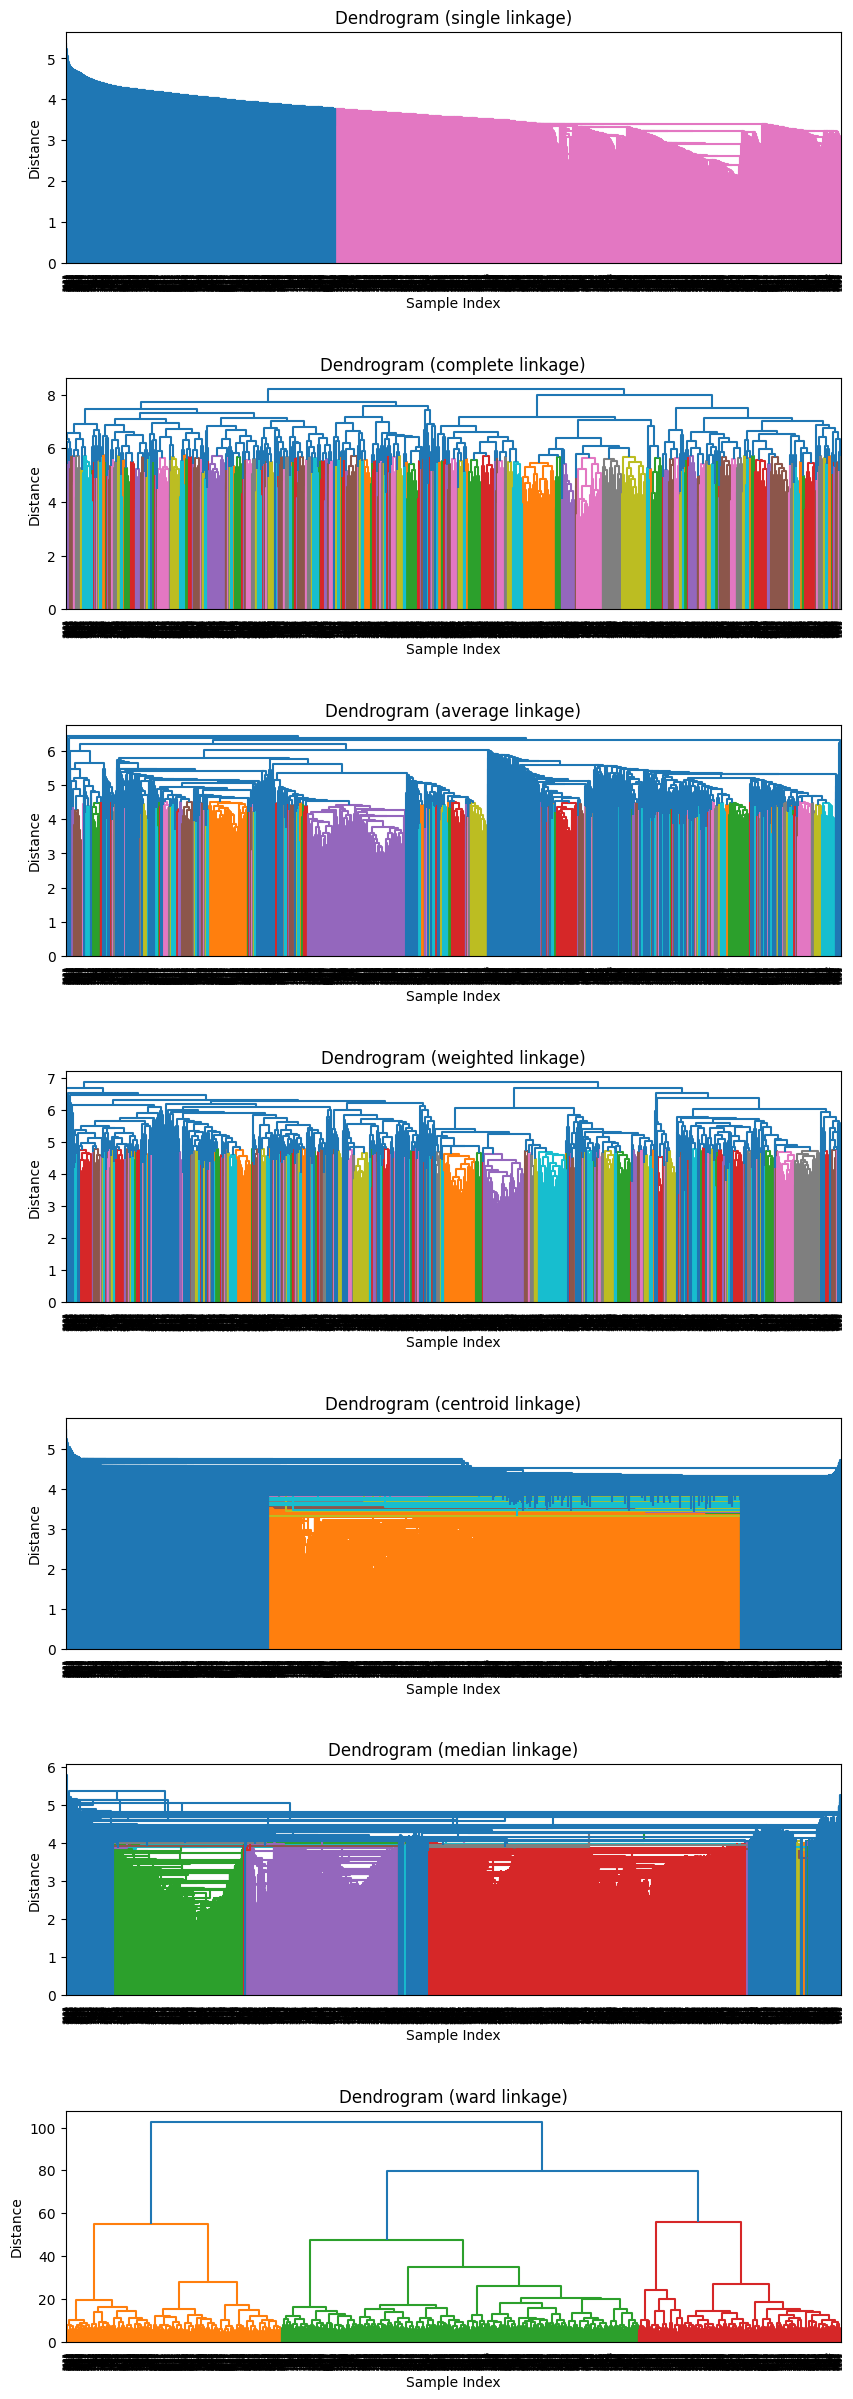

In [4]:
# Display the dendrogram graph for all linkage matrices for each metric.
HRM.plot_dendrogram_all_methods(dataset)

The *ward method* is the most appropriate dendrograms, **I will chose it since it is more readable.**

In [3]:
# Calculate the linkage matrix by the ward metric
ward_linkage = HRM.get_linkage(dataset, 'ward')

## Number of Clusters

Finding an interesting number of clusters in a dendrogram is the same as **finding the largest horizontal space that doesn't have any vertical lines** (the space with the longest vertical lines). 
***This means that there's more separation between the clusters.***

According to the previous dendrogram graph, the ideal **number of clusters** is obtained by cutting the graph **at distance 60**.

**The number of clusters can be three or four**, depending on where we will cut the longest distance.

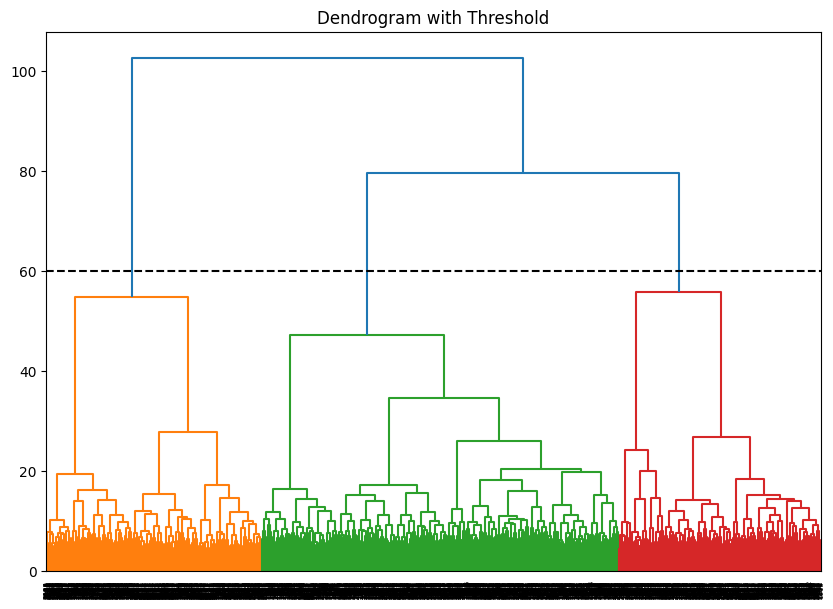

In [4]:
# Display the dendrogram with the threshould cutting at 60 
HRM.plot_thresholded_dendrogram(ward_linkage, 60)

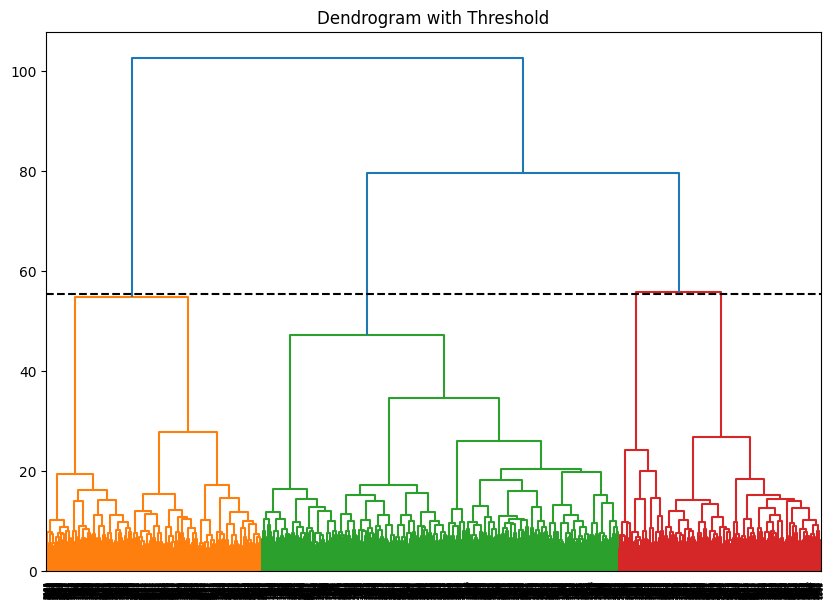

In [5]:
# Display the dendrogram with the threshould cutting at 55.5
HRM.plot_thresholded_dendrogram(ward_linkage, 55.5)

# Hierarchical Clustering

## Three Clusters

In [6]:
# number of clusters based on the dendrogram graph
k = 3

### Clustering Before PCA

In [7]:
# Create a copy of the origin dataset
dataset_3k_before_PCA = dataset.copy()

In [8]:
# Assign cluster labels to each row of the DataFrame
dataset_3k_before_PCA['cluster'] = HRM.hierarchical_clustering(ward_linkage, k)

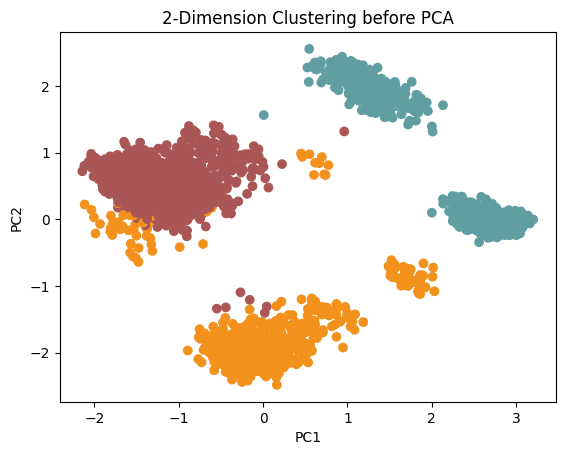

In [9]:
# Create a 2-dimension scatter plot of the data for clustering before reduction
HRM.plot_clustering_before_reduction(dataset_3k_before_PCA, 2)

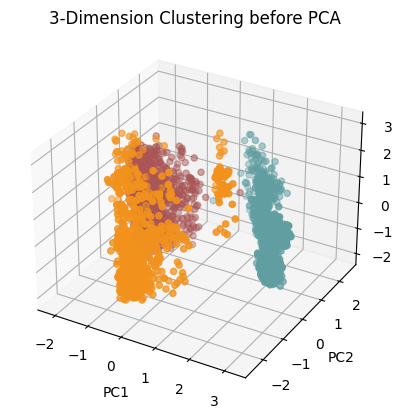

In [10]:
# Create a 3-dimension scatter plot of the data for clustering before reduction
HRM.plot_clustering_before_reduction(dataset_3k_before_PCA, 3)

### Clustering After PCA

In [11]:
# Create a copy of the origin dataset
dataset_3k_after_PCA = dataset.copy()

In [12]:
# Perform PCA on the data for 2 component
transformed_3k_2D_After_PCA = HRM.get_transform_PCA(dataset_3k_after_PCA, 2)

In [13]:
# Perform PCA on the data for 3 component
transformed_3k_3D_After_PCA = HRM.get_transform_PCA(dataset_3k_after_PCA, 3)

In [14]:
# Calculate the linkage matrix by the ward metric for transformed data
ward_linkage_3k_after_PCA = HRM.get_linkage(transformed_3k_2D_After_PCA, 'ward')

In [15]:
# Assign cluster labels to each row of the DataFrame
dataset_3k_after_PCA['cluster'] = HRM.hierarchical_clustering(ward_linkage_3k_after_PCA, k)

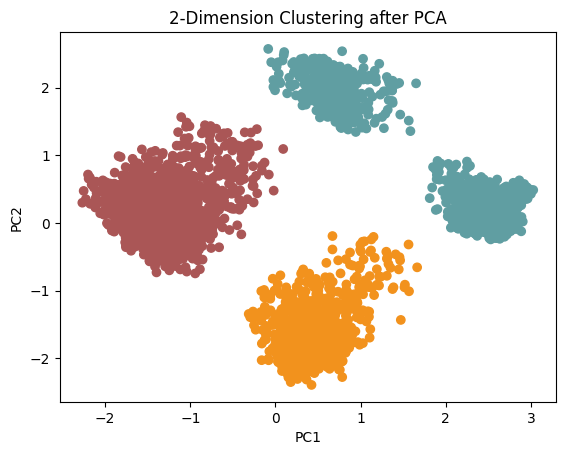

In [16]:
# Create a 2-dimension scatter plot of the data for clustering after reduction
HRM.plot_clustering_after_reduction(dataset_3k_after_PCA, transformed_3k_2D_After_PCA, 2)

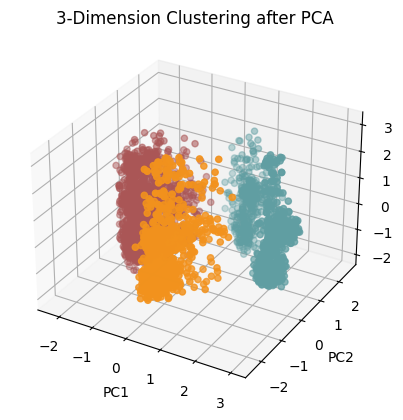

In [17]:
# Create a 3-dimension scatter plot of the data for clustering after reduction
HRM.plot_clustering_after_reduction(dataset_3k_after_PCA, transformed_3k_3D_After_PCA, 3)

## Four Clusters

In [18]:
# number of clusters based on the dendrogram graph
k = 4

### Clustering After PCA

In [19]:
# Create a copy of the origin dataset
dataset_4k_after_PCA = dataset.copy()

In [20]:
# Perform PCA on the data for 2 component
transformed_4k_2D_After_PCA = HRM.get_transform_PCA(dataset_4k_after_PCA, 2)

In [21]:
# Perform PCA on the data for 3 component
transformed_4k_3D_After_PCA = HRM.get_transform_PCA(dataset_4k_after_PCA, 3)

In [22]:
# Calculate the linkage matrix by the ward metric for transformed data
ward_linkage_4k_after_PCA = HRM.get_linkage(transformed_4k_2D_After_PCA, 'ward')

In [23]:
# Assign cluster labels to each row of the DataFrame
dataset_4k_after_PCA['cluster'] = HRM.hierarchical_clustering(ward_linkage_4k_after_PCA, k)

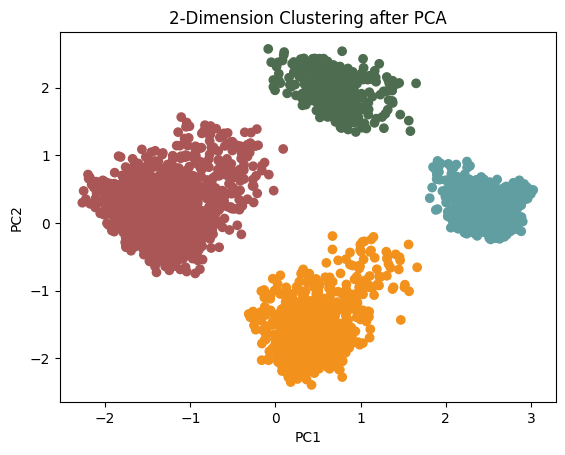

In [24]:
# Create a 2-dimension scatter plot of the data for clustering after reduction
HRM.plot_clustering_after_reduction(dataset_4k_after_PCA, transformed_4k_2D_After_PCA, 2)

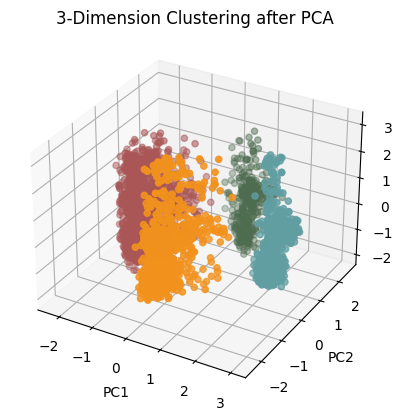

In [25]:
# Create a 3-dimension scatter plot of the data for clustering after reduction
HRM.plot_clustering_after_reduction(dataset_4k_after_PCA, transformed_4k_3D_After_PCA, 3)